<center><img src="https://techcrunch.com/wp-content/uploads/2017/11/next-gen-stats.jpg?w=1390&crop=1" style="width: 600px; margin-left: 160px" /></center>

<center> <h1 style="font-size: 35px">Predicting Potential Hall of Fame Candidates in the National Football League </h1> </center>

<center style="margin-left: -55px"> Charles Fentonmiller, Max Sidebotham </center>

# <center> Introduction </center>

Football is one of the most popular and most violent sports in the United States. On every level of competition be it high school, collegiate, or professional, football brings in more money and more attention in the United States than any other sport. The NFL or the National Football League is the biggest football organization in the world. With each team in the organization averaging around 2.86 billion dollars in net worth and each game pulling in over 158 million viewers with the Superbowl reaching around 100 million; the NFL is a monster of an association.  

Football is played on a grass field that spans 120 yards with ten of those yards at each end representing the endzone for each team. At any given time in a game, there are eleven people from each team taking turns playing offence or defense with the goal of moving the ball to the other teams endzone or stopping the opposition from doing the same thing. There are many different positions on the offensive and defensive sides but the most important position by far is the quarterback. The quarterback is the leader of the offence and touches the ball every single play, because of this the quarterback has the most influence on the outcome of a game compared to all other positions which may only touch the ball a small percentage of the snaps. Generally, a quarterback can choose to either throw the ball to a receiver, run himself, or hand it off to a running back for a run. This means that the easiest way to compare quarterbacks is with stats such as passing yards or touch down to interception ratios because his main job is to throw the ball and when he hands it off someone else is doing the work. Throughout the course of a season sports analysists will look at these basic stats each game to determine how good a quarterback is playing, yet in the end, because a quarterback has so much to do with the outcome of a game, if a team does not make it to the playoffs and do well the brunt of the blame is places on him. Therefore, there are sometimes discrepancies between stats and championships, some QBs can put up numbers but their teams are not good enough to win while other QBs may put up worse stats but still win.

Sports in general tend to be a hard topic for data analytics because there are so many things that could affect the outcome of a game or how well a player performs. There are some players that do not put up good stats but have intangibles such as leadership or the ability to stay calm under pressure that may lead to them winning more games and are very hard to record and quantify. This leads to some players making you just believe in them or give you the feeling that they are good even if there is no real reason to think so.

The Pro Football Hall of Fame represents a list of all the best players determined by a committee of qualified individuals. When a player retires the commute reviews that players career and votes on whether they belong in the Hall of Fame.  There are no specific rules or clear equation that results in a player getting the thumbs up or thumbs down from the committee; votes are cast based on whatever each member thinks are important. Because of this, many people get upset when certain players are voted in or left out due to the subjectiveness of the voting. The goals of this project are to see if there are common trends that place a quarterback in the Hall of Fame and to be able to accurately determine if a player will eventually make it into the Hall of Fame.

Data was collected and merged from Pro Football Reference and a Kaggle data set called NFL-Statistics.

# <center> Imports and Settings </center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None

# <center> Retrieving and Parsing the Data </center>

## <center> Hall Of Fame Players </center>

In [2]:
hof_data = pd.read_csv('data/HOF_data.csv')

In [3]:
# Check if player is a QB
def qb_and_rb(pos):
    if pos == 'QB':
        return pos
    else:
        return np.nan

In [4]:
hof_data['Pos'] = hof_data['Pos'].apply(lambda x: qb_and_rb(x))
# Remove Unneeded Columns
hof_data.drop('Lng.2', axis=1, inplace=True)
hof_data.drop('Lng.1', axis=1, inplace=True)
hof_data.drop('TD.2', axis=1, inplace=True)
hof_data.drop('Yds.3', axis=1, inplace=True)
hof_data.drop('Yds.1', axis=1, inplace=True)
hof_data.drop('Rec', axis=1, inplace=True)
hof_data.drop('CarAV', axis=1, inplace=True)
hof_data.drop('St', axis=1, inplace=True)
hof_data.drop('Lng', axis=1, inplace=True)

In [5]:
# Drop unusable rows and reset
hof_data.dropna(inplace=True)
hof_data.reset_index(inplace=True)
hof_data.drop('index', axis=1, inplace=True)

In [6]:
# Rename columns for better understanding
hof_data.rename(columns={'AP1': 'First_Team_AP', 'G': 'Num_Games', 'PB': 'Pro_Bowl', 'Cmp': 'Pass_Cmp', 'Att': 'Pass_Att', 'Yds': 'Pass_Yds'}, inplace=True)
hof_data.rename(columns={'TD': 'Pass_TD', 'Int': 'Interceptions', 'Sk': 'Times_Sacked', 'Att.1': 'Rushing_Att', 'Yds.2': 'Rushing_Yds', 'TD.1': 'Rushing_Tds',}, inplace=True)

In [7]:
hof_data.head()

,Rk,Player,Pos,Indct,From,To,First_Team_AP,Pro_Bowl,Num_Games,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Interceptions,Times_Sacked,Rushing_Att,Rushing_Yds,Rushing_Tds
0,19,Kurt Warner\WarnKu00,QB,2017,1998,2009,2,4,124,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0
1,20,Brett Favre\FavrBr00,QB,2016,1991,2010,3,11,302,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0
2,24,Ken Stabler\StabKe00,QB,2016,1970,1984,1,4,184,2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0
3,81,Troy Aikman\AikmTr00,QB,2006,1989,2000,0,6,165,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0
4,83,Warren Moon\MoonWa00,QB,2006,1984,2000,0,9,208,3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0


## <center> Statistics and Information on All Players </center>

In [8]:
basic_stats = pd.read_csv('data/Basic_Stats.csv')

In [1]:
basic_stats = pd.read_csv('data/Basic_Stats.csv')
# Remove unneeded columns and remove rows with NA
basic_stats.drop('Position', axis=1, inplace=True)
basic_stats.drop('Number', axis=1, inplace=True)
basic_stats.drop('Current Team', axis=1, inplace=True)
basic_stats.drop('High School', axis=1, inplace=True)
basic_stats.drop('Years Played', axis=1, inplace=True)
basic_stats.drop('Age', axis=1, inplace=True)
basic_stats.drop('High School Location', axis=1, inplace=True)
basic_stats.dropna(inplace=True)
basic_stats.reset_index(inplace=True)
basic_stats.drop('index', axis=1, inplace=True)
basic_stats.rename(columns={'Player Id': 'Player_Id'}, inplace=True)
basic_stats.head()

NameError: name 'pd' is not defined

## <center> Linking Player ID From Stats Tables to HoF Table </center>

In [10]:
player_ids = []
not_in = []
not_in_index = []
i = 0
# Parse player IDs and convert them into universal name variables
for item in hof_data['Player']:
    name = item.split('\\')[0]
    name = name.split(' ')
    name = name[1] + ', ' + name[0]
    found = basic_stats[basic_stats['Name'].str.contains(name)]
    if name == 'Young, Steve':
        player_ids.append(found.Player_Id.to_string().split(' ')[8])
    elif name == 'Kelly, Jim':
        player_ids.append(found.Player_Id.to_string().split(' ')[10])
    else:
        check = found.Player_Id.to_string().split(' ')
        if len(check) < 5:
            not_in.append(name)
            not_in_index.append(i)
        else:
            player_ids.append(found.Player_Id.to_string().split(' ')[4])
    
    i = i + 1

In [11]:
hof_data_with_id = hof_data.drop(2, axis=0)
# Removing Hall of Famers not in Kaggle Dataset
hof_data_with_id.drop(4, axis=0, inplace=True)
hof_data_with_id.drop(9, axis=0, inplace=True)
hof_data_with_id.drop(11, axis=0, inplace=True)
hof_data_with_id.drop(12, axis=0, inplace=True)
hof_data_with_id.drop(16, axis=0, inplace=True)
hof_data_with_id.drop(17, axis=0, inplace=True)
hof_data_with_id.drop(18, axis=0, inplace=True)
hof_data_with_id.drop(20, axis=0, inplace=True)
hof_data_with_id.reset_index(inplace=True)
hof_data_with_id.drop('index', axis=1, inplace=True)
hof_data_with_id['Player_Id'] = player_ids

In [12]:
hof_data_with_id.head()

,Rk,Player,Pos,Indct,From,To,First_Team_AP,Pro_Bowl,Num_Games,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Interceptions,Times_Sacked,Rushing_Att,Rushing_Yds,Rushing_Tds,Player_Id
0,19,Kurt Warner\WarnKu00,QB,2017,1998,2009,2,4,124,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,kurtwarner/2503540
1,20,Brett Favre\FavrBr00,QB,2016,1991,2010,3,11,302,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,brettfavre/2500606
2,81,Troy Aikman\AikmTr00,QB,2006,1989,2000,0,6,165,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,troyaikman/2499369
3,87,Dan Marino\MariDa00,QB,2005,1983,1999,3,9,242,4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,danmarino/2501869
4,89,Steve Young\YounSt00,QB,2005,1985,1999,3,7,169,2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,steveyoung/2503843


## <center> Retrieving Quarterback Statistics </center>

In [13]:
qb = pd.read_csv('data/Game_Logs_Quarterback.csv')

In [14]:
# win marked by 1 loss is 0
# home marked by 1 away marked by 0

In [15]:
# Drop unnecessary columns and rearrange data for better understanding
qb.drop('Position', axis=1, inplace=True)
qb.drop('Game Date', axis=1, inplace=True)
qb.drop('Games Played', axis=1, inplace=True)
qb.drop('Games Started', axis=1, inplace=True)
qb['Season'] = qb['Season'].apply(lambda x: np.nan if x == 'Preseason' else x)
qb['Home or Away'] = qb['Home or Away'].apply(lambda x: 0 if x == 'Away' else 1)
qb.rename(columns={'Home or Away': 'Home'}, inplace=True)
qb = qb.replace('--',0)
qb.dropna(inplace=True)
qb.drop('Season', axis=1, inplace=True)
qb['Outcome'] = qb['Outcome'].apply(lambda x: 0 if x == 'L' else 1)
qb.reset_index(inplace=True)
qb.drop('index', axis=1, inplace=True)
qb.head()

,Player Id,Name,Year,Week,Home,Opponent,Outcome,Score,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
0,billdemory/2512778,"Demory, Bill",1974,1,0,KC,0,16 to 24,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
1,billdemory/2512778,"Demory, Bill",1974,2,0,CHI,1,23 to 21,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
2,billdemory/2512778,"Demory, Bill",1974,3,0,BUF,0,12 to 16,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
3,billdemory/2512778,"Demory, Bill",1974,4,0,MIA,0,17 to 21,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
4,billdemory/2512778,"Demory, Bill",1974,5,1,NE,0,0 to 24,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0


In [16]:
qb['Num_Games'] = np.ones(len(qb))

In [17]:
qb = qb.convert_objects(convert_numeric=True)
qb_sum = qb.groupby(['Name']).sum()
qb_sum.drop(['Year', 'Week', 'Home', 'Outcome', 'Passer Rating'], axis=1, inplace=True)
qb_sum['Player Id'] = qb_sum.index

c:\users\stoney\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [18]:
# Adding Active
basic_stats = basic_stats.rename(columns={"Name": "Player Id"})
current_status = basic_stats.drop(["Birth Place", "Birthday", "College", "Player_Id", "Experience", "Height (inches)", "Weight (lbs)"], axis=1)

qb_sum = pd.merge(qb_sum, current_status, on='Player Id', how='outer')
qb_sum = qb_sum.dropna(thresh=5)

qb_sum.head()

,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost,Num_Games,Player Id,Current Status
0,212.0,408.0,1161.3,2733.0,161.0,12.0,27.0,59.0,447.0,38.0,155.0,89.8,0.0,0.0,0.0,61.0,"Adams, Tony",Retired
1,17.0,39.0,322.5,232.0,53.6,2.0,4.0,9.0,73.0,14.0,63.0,25.8,0.0,0.0,0.0,85.0,"Adkins, Sam",Retired
2,3235.0,5249.0,11226.2,36961.0,1303.4,189.0,159.0,295.0,1983.0,360.0,1103.0,410.9,10.0,53.0,24.0,208.0,"Aikman, Troy",Retired
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"Ainge, Erik",Retired
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,"Allen, Brandon",Active


## <center> Moving all data into singular DataFrame </center>

In [19]:
master_data = hof_data.copy()
master_data.drop(['Pos', "Indct", "From", 'To', 'Rk', 'First_Team_AP', 'Pro_Bowl'], axis=1, inplace=True)

# Convert playerID to names
def convert_id(x):
    x = x.split('\\')[0]
    x = x.split(' ')
    x = x[1] + ', ' + x[0]
    return x

# Rename columns for better understanding
master_data = master_data.rename(columns={
    "Pass_Cmp": "Passes Completed",
    "Pass_Att": "Passes Attempted",
    "Pass_Yds": "Passing Yards",
    "Pass_TD": "TD Passes",
    "Interceptions": "Ints",
    "Times_Sacked": "Sacks",
    "Rushing_Att": "Rushing Attempts",
    "Rushing_Yds": "Rushing Yards",
    "Rushing_Tds": "Rushing TDs",
    "Player": "Player Id"
})

master_data['Player Id'] = master_data['Player Id'].apply(convert_id)

In [20]:
# Set Hall of Fame status and whether or not they are currently in the NFL
master_data['HoF'] = master_data['Player Id'].apply(lambda x: True)
master_data = pd.concat([master_data, qb_sum], ignore_index=True, sort=False)
master_data.drop_duplicates(subset=['Player Id'], inplace=True, keep='first')
master_data['HoF'] = master_data['HoF'].replace(np.nan, False)
master_data['Current Status'] = master_data['Current Status'].replace(np.nan, 'Retired')
# Remove columns with little data
master_data = master_data.dropna(thresh=len(master_data) - 140, axis=1)

master_data.head()

,Player Id,Num_Games,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status
0,"Warner, Kurt",124.0,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
1,"Favre, Brett",302.0,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
2,"Stabler, Ken",184.0,2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
3,"Aikman, Troy",165.0,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
4,"Moon, Warren",208.0,3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired


## <center> Adding Game Winning Drives For All Players </center>

In [21]:
gwd = pd.read_csv('data/game_winning_drives.csv')

In [22]:
def gwd_id_convert(x):
    x = x.split('\\')[0]
    x = x.split(' ')
    x = x[1].replace('+', '') + ', ' + x[0]
    return x

# Convert names to the universal format we are using
gwd['Player'] = gwd['Player'].apply(gwd_id_convert)

In [23]:
gwd = gwd.rename(columns={"Player": "Player Id"})
gwd.drop(["Rank", "Years", "Tm", "Link"], axis=1, inplace=True)
master_data[master_data['HoF'] == True]
master_data = pd.merge(master_data, gwd, on='Player Id', how='outer')
master_data.head()

,Player Id,Num_Games,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status,GWD
0,"Warner, Kurt",124.0,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0
1,"Favre, Brett",302.0,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0
2,"Stabler, Ken",184.0,2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0
3,"Aikman, Troy",165.0,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
4,"Moon, Warren",208.0,3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0


In [24]:
# Remove null with 5 or more null values
#master_data = master_data.dropna(thresh=5)

# Replace Nan with 0
master_data['GWD'] = master_data['GWD'].replace(np.nan, 0)

##  <center> Adding Superbowl Wins For All Players </center>

In [25]:
sup_wins = pd.read_excel('data/Super_Bowls.xlsx')
sup_wins = sup_wins.rename(columns={"Name" : "Player Id", "Wins": "Superbowl Wins"})

In [26]:
# Add superbowl wins to master dataframe
master_data = pd.merge(master_data, sup_wins, on='Player Id', how='outer')

In [27]:
master_data.drop(["Completion Percentage", "Passing Yards Per Attempt", "Fumbles", "Fumbles Lost", "Sacked Yards Lost", "Yards Per Carry"], axis=1, inplace=True)
master_data['Superbowl Wins'] = master_data['Superbowl Wins'].replace(np.nan, 0)
master_data.dropna(inplace=True)
master_data.head()

,Player Id,Num_Games,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Current Status,GWD,Superbowl Wins
0,"Warner, Kurt",124.0,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,Retired,3.0,1.0
1,"Favre, Brett",302.0,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,Retired,2.0,1.0
2,"Stabler, Ken",184.0,2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,Retired,3.0,1.0
3,"Aikman, Troy",165.0,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,Retired,1.0,3.0
4,"Moon, Warren",208.0,3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,Retired,2.0,0.0


# <center> Graphing and Analyzing the Data </center>

All the data graphed below is filtered to only plot the retired players. This is done because the graphs are meant to try to find differences between the hall of fame players and the rest of the group. If active players are included, players that might be in the hall of fame later will show up as normal players and potentially make the graphs misleading.

## <center> Interceptions vs Touchdown Passes </center>

In [28]:
retired = master_data[master_data["Current Status"] == "Retired"].copy()

[Text(0, 0.5, 'Interceptions'),
 Text(0.5, 0, 'Touchdown Passes'),
 Text(0.5, 1.0, 'Standard Deviation of Interceptions vs Touchdown Passes')]

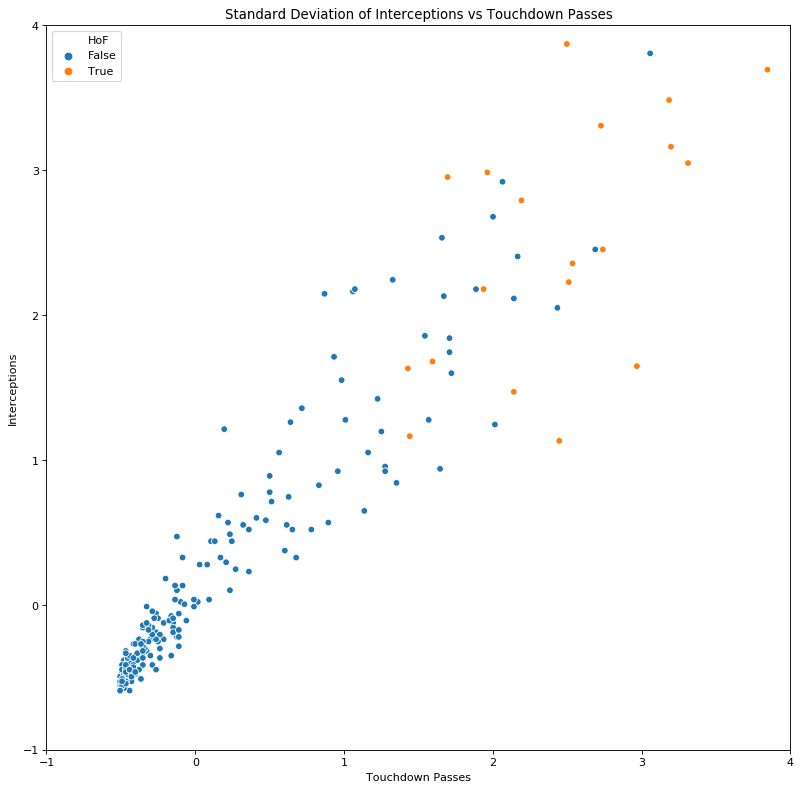

In [29]:
plt.figure(figsize=(12, 12), dpi=80)
plt.ylim(-1, 4)
plt.xlim(-1, 4)

retired['TD Passes'] = (retired["TD Passes"] - np.mean(retired["TD Passes"])) / np.std(retired["TD Passes"])
retired['Ints'] = (retired["Ints"] - np.mean(retired["Ints"])) / np.std(retired["Ints"])

ax = sns.scatterplot(x="TD Passes", y="Ints", data=retired, hue="HoF")
ax.set(
        xlabel='Touchdown Passes',
        ylabel='Interceptions',
        title='Standard Deviation of Interceptions vs Touchdown Passes')

This graph plots career touchdown passes against career interceptions both in terms of their respective standard deviations. In football a quarterback is graded on how well they keep the ball out of the other teams’ hands and how well they put it in in the endzone. From the graph we can see that all the quarterbacks in the hall of fame are at least 1.5 standard deviations away from the pack in touchdown passes with most of them around 2 standard deviations away. However, most of the hall of fame players are also 1 standard deviation above the mean in interceptions. This leads to the conclusion that hall of famers probably played much longer than your average player, that is why they accumulated more touchdown passes and interceptions. There seems to be an almost linear correlation as we go from left to right on the plot.

1)

## <center> Passing Yards per Game vs Touchdown Passes per Game</center>

In [30]:
retired = master_data[master_data["Current Status"] == "Retired"].copy()

[Text(0, 0.5, 'Passing Yards per Game'),
 Text(0.5, 0, 'Touchdown Passes per Game'),
 Text(0.5, 1.0, 'Passing Yards per Game vs Touchdown Passes per Game')]

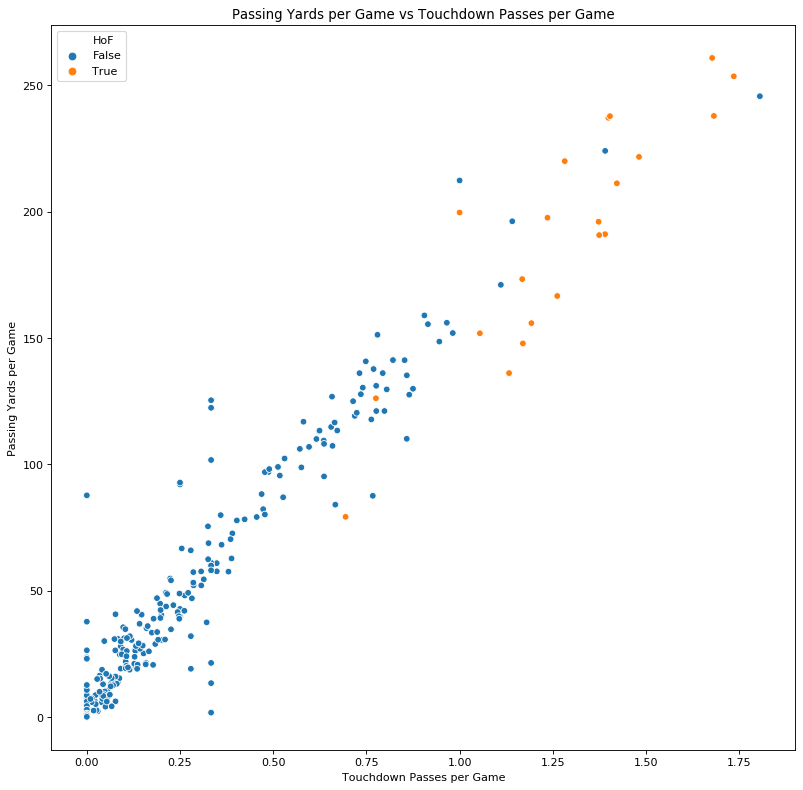

In [31]:
plt.figure(figsize=(12, 12), dpi=80)

retired['TD Passes'] = retired['TD Passes'] / retired['Num_Games']
retired['Passing Yards'] = retired['Passing Yards'] / retired['Num_Games']

ax = sns.scatterplot(x="TD Passes", y="Passing Yards", data=retired, hue="HoF")
ax.set(
        xlabel='Touchdown Passes per Game',
        ylabel='Passing Yards per Game',
        title='Passing Yards per Game vs Touchdown Passes per Game')

Because the plot before this plot was potentially skewed by hall of fame players playing more total games, this plot shows per game averages. Touchdown passes per game is plotted on the x-axis while passing yards per game is plotted in the y-axis. This graph makes it pretty clear that hall of fame players tend to put up better numbers for both of these stats with very few players averaging more than 175 yards and 1.25 touchdowns a game and not making it in.

## <center> Understanding Playoff Game Winning Drives </center>

In [32]:
retired = master_data[master_data["Current Status"] == "Retired"].copy()

[Text(0, 0.5, 'Number of QBs'),
 Text(0.5, 0, 'Game Winning Drives'),
 Text(0.5, 1.0, 'Number of QBs vs Game Winning Drives')]

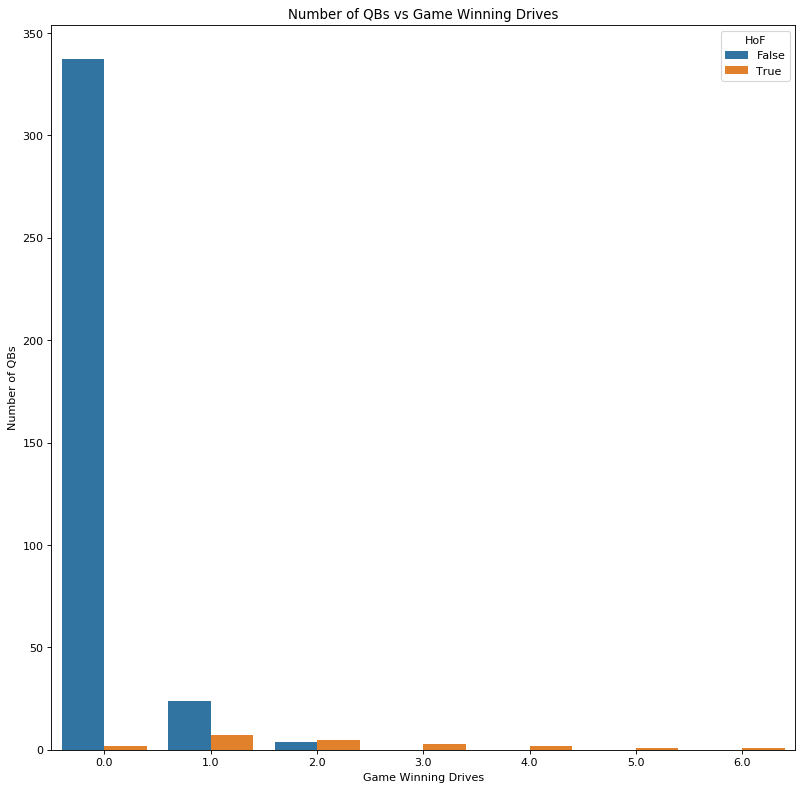

In [33]:
plt.figure(figsize=(12, 12), dpi=80)
#plt.ylim(0, 100)
# plt.xlim(-1, 4)

ax = sns.countplot(x="GWD", data=retired, hue="HoF")
ax.set(
        xlabel='Game Winning Drives',
        ylabel='Number of QBs',
        title='Number of QBs vs Game Winning Drives')

In football, the playoffs are as high stakes as it gets. If you lose you are out and have no hope of winning a championship. When a quarterback can bring his team back in the playoffs in front of millions of people it is almost always remembered. Some players can win big games despite not having good numbers on a stat sheet and because people vote hall of famers in and there is no formula, it is important to isolate quarterback performance in big games. It is clear that if a quarterback has even one game winning drive their odds of getting into the hall of fame skyrockets with anyone with more than three always getting in.

## <center> Passes Incomplete vs Sacks </center>

[Text(0, 0.5, 'Passes Incomplete'),
 Text(0.5, 0, 'Sacks'),
 Text(0.5, 1.0, 'Passes Incomplete vs Sacks')]

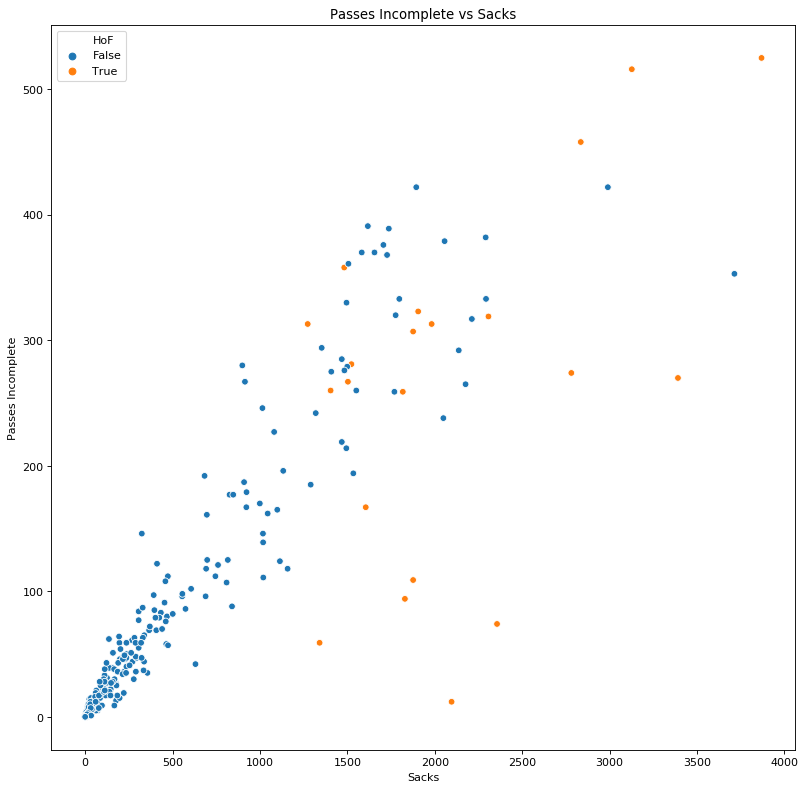

In [34]:
plt.figure(figsize=(12, 12), dpi=80)

retired['Passes Incomplete'] = retired['Passes Attempted'] - retired['Passes Completed']

ax = sns.scatterplot(x="Passes Incomplete", y='Sacks', data=retired, hue="HoF")
ax.set(
        xlabel='Sacks',
        ylabel='Passes Incomplete',
        title='Passes Incomplete vs Sacks')

Getting sacked can change a game. If a quarterback is able to throw the ball away before being tackled for a big loss of yards the odds a drive stay alive are much higher. This graph plots sacks against passes incomplete. There is not much correlation here and the only thing that can be drawn from the plot is again that hall of fame players must have had longer careers in order to pile up more overall stats be it good or bad. Points seem to almost be random distributed.

## <center> Superbowl Wins </center>

[Text(0, 0.5, 'Number of QBs'),
 Text(0.5, 0, 'Superbowl Wins'),
 Text(0.5, 1.0, 'Number of QBs vs Superbowl Wins')]

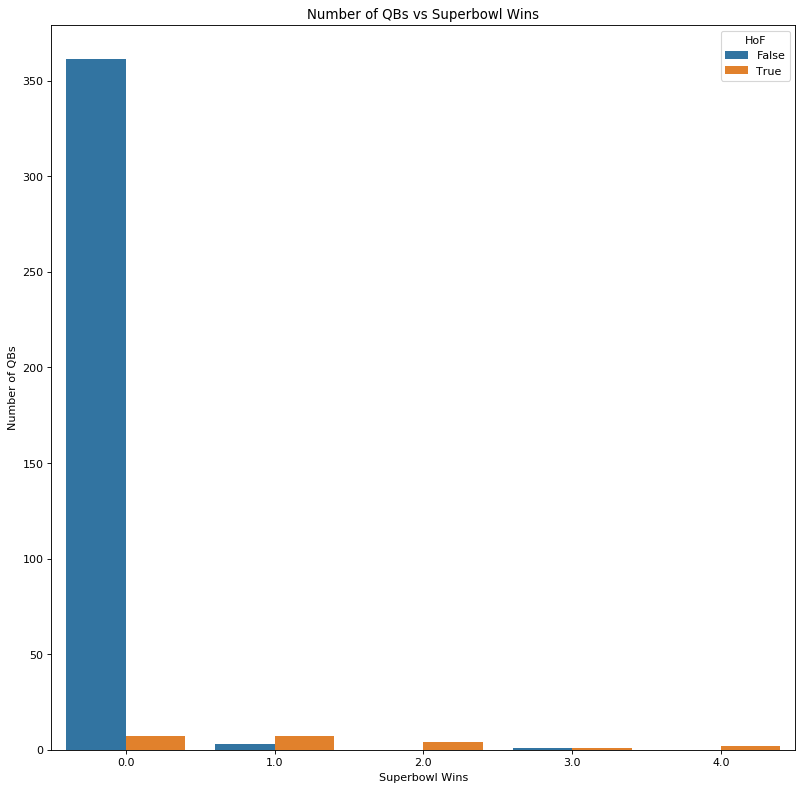

In [35]:
plt.figure(figsize=(12, 12), dpi=80)

ax = sns.countplot(x="Superbowl Wins", data=retired, hue="HoF")
ax.set(
        xlabel='Superbowl Wins',
        ylabel='Number of QBs',
        title='Number of QBs vs Superbowl Wins')

In the same way that game winning drives in the playoffs can make a player famous, the Superbowl is the ultimate test. The Superbowl is the most viewed sporting event in the world every year and unlike playoff and regular season games there is only one a year. Most of the blame falls on a quarterback for the wins and losses throughout the year and if a team is able to win a Superbowl a lot of the credit is given to him. This bar graph shows number of Superbowl victories on the x-axis and number of players on the y-axis. Very few quarterbacks have won a Superbowl and if a quarterback wins even one their odds of getting in increase by a lot just how they did with playoff game winning drives.

# <center> Machine Learning </center>

## <center> SVM Using Multiple Features </center>

Our first objective was to use multiple features in the dataframe in order to see if there was general correlation between many of the recorded data points and whether or not a player was in the Hall of Fame. After looking at the graphs above, you can see general trends where members in the Hall of Fame have higher game winning drives, superbowl wins, and touchdown passes per game. Many people believe that these features are what determine hall of famers, so we decided to see if we could find this same theory using an SVM.

In [37]:
# Create dataframe with only retired players and replace HoF status with binary for ML
retired = master_data[master_data["Current Status"] == "Retired"].copy()
retired['HoF'] = retired['HoF'].apply(lambda x: 0 if not x else 1)
retired.dropna(inplace=True)
retired.head()

,Player Id,Num_Games,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Current Status,GWD,Superbowl Wins
0,"Warner, Kurt",124.0,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,1,Retired,3.0,1.0
1,"Favre, Brett",302.0,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,1,Retired,2.0,1.0
2,"Stabler, Ken",184.0,2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,1,Retired,3.0,1.0
3,"Aikman, Troy",165.0,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,1,Retired,1.0,3.0
4,"Moon, Warren",208.0,3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,1,Retired,2.0,0.0


In [38]:
X = retired.drop(["Player Id", "Current Status", "HoF"], axis=1)
y = retired['HoF']

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma='auto').fit(X_train, y_train)

In [39]:
test = retired[retired['HoF'] == 1]
test = test.drop(["Player Id", "Current Status", "HoF"], axis=1)
svm_outcome = clf.predict(test)
print('The SVM model was able to guess ' + str(np.mean(svm_outcome) * 100) + '% of the hall of famers correctly')
print('and the set as a whole ' + str(clf.score(X_test, y_test) * 100) + '% correctly')

The SVM model was able to guess 52.38095238095239% of the hall of famers correctly
and the set as a whole 92.1875% correctly


Here we can see that the SVM using all of the features was not able to predict the members of the Hall of Fame very well. Although it was able to predict fairly well on the entire set, that is to be expected as only about 4% of the dataset we used are part of the hall of fame. This helps us understand that using all of these statistics actually hurts our case and inhibits us from producing desired results when using a support vector machine. In order to get better and more accurate results, we decided our next courses of action would be using feature selection to choose features which showed more promise towards displaying correlation and using other forms of machine learning, specifically logistic regression.

## <center> SVM Using Superbowl Wins, GWD, and TD Passes Per Game </center>

In [40]:
filtered_data = retired[['HoF', 'Superbowl Wins', 'GWD']]
filtered_data['TD Passes'] = retired['TD Passes'] / retired['Num_Games']
filtered_data.head()

,HoF,Superbowl Wins,GWD,TD Passes
0,1,1.0,3.0,1.677419
1,1,1.0,2.0,1.682119
2,1,1.0,3.0,1.054348
3,1,3.0,1.0,1.000000
4,1,0.0,2.0,1.399038


In [41]:
X = filtered_data.drop(["HoF"], axis=1)
y = filtered_data['HoF']

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma='auto').fit(X_train, y_train)

In [42]:
print('The SVM model was able to guess ' + str(clf.score(X_test, y_test) * 100) + '% of the player\'s Hall of Fame status correctly')

The SVM model was able to guess 98.4375% of the player's Hall of Fame status correctly


In [43]:
test = filtered_data[filtered_data['HoF'] == 1]
test = test.drop('HoF', axis=1)
outcome = clf.predict(test)

correct = str(len(outcome[np.where(outcome == 1)]) / len(outcome) * 100)
print(outcome)
print(np.array(filtered_data[filtered_data['HoF'] == 1]['HoF']))
print()
print('When testing on only the Hall of Fame candidates, the SVM was able to get ' + correct + '% of them correct')

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

When testing on only the Hall of Fame candidates, the SVM was able to get 80.95238095238095% of them correct


After only using Superbowl wins, game winning drives, and touchdown passes to determine Hall of Fame candidacy, we saw a significant increase in accuracy while using an SVM. Although the accuracy was not as high as using the logistic regression above, we can see that using feature selection in a correct manner can be an important factor when using machine learning on your dataset.

# <center> Utilizing the NFL Quarterback Rating (QBR) </center>

## <center> Adding and Graphing QBR </center>

In [44]:
# Formulas to create the QBR for each player
def clamp(x, min_n, max_n):
    return min(max(x, min_n), max_n)

def QBR (att, comp, yds,td, inter):
    first = clamp((((comp / att) - 0.3) * 5), min_n=0, max_n=2.375)
    second = clamp((((yds / att) - 3) * 0.25), min_n=0, max_n=2.375) 
    third = clamp(((td / att) * 20), min_n=0, max_n=2.375)
    fourth = clamp((2.375 - ((inter / att) * 25))  , min_n=0, max_n=2.375)
 
    return round(((first + second + third + fourth) / 6) * 100, 1)

In [45]:
def get_ratings(data):
    ratings = []
    for index, row in data.iterrows():
        ratings.append(int(QBR(row['Passes Attempted'], row['Passes Completed'], row['Passing Yards'], row['TD Passes'], row['Ints'])))
    
    return ratings

In [46]:
retired = master_data[(master_data["Current Status"] == "Retired") & (master_data["Passing Yards"] > 1000)].copy()
rating = get_ratings(retired)

In [47]:
retired['qbr'] = rating
retired['HoF'] = retired['HoF'].apply(lambda x: 0 if not x else 1)
filtered_data = retired[['HoF', 'Superbowl Wins', 'GWD', 'qbr', 'TD Passes', 'Num_Games']]
filtered_data.head()

,HoF,Superbowl Wins,GWD,qbr,TD Passes,Num_Games
0,1,1.0,3.0,93,208.0,124.0
1,1,1.0,2.0,86,508.0,302.0
2,1,1.0,3.0,75,194.0,184.0
3,1,3.0,1.0,81,165.0,165.0
4,1,0.0,2.0,80,291.0,208.0


[Text(0.5, 0, 'Touchdown Passes'),
 Text(0.5, 1.0, 'Passing Yards vs Touchdown Passes')]

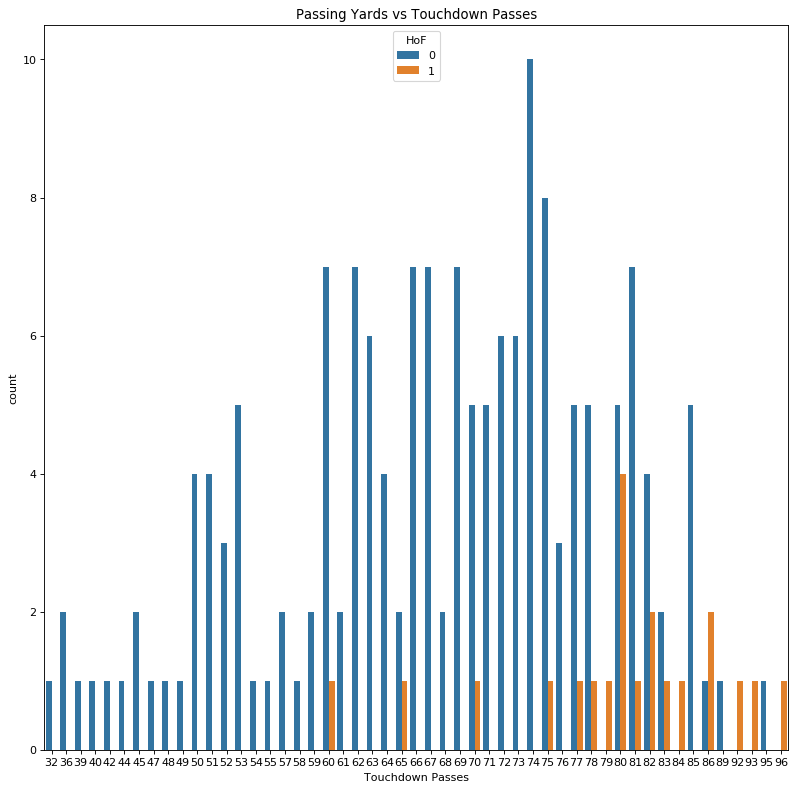

In [48]:
plt.figure(figsize=(12, 12), dpi=80)

ax = sns.countplot(x="qbr", data=retired, hue="HoF")
ax.set(
        xlabel='Touchdown Passes',
        title='Passing Yards vs Touchdown Passes')

# Retraining the Model with QBR

In [49]:
retired = master_data[(master_data["Current Status"] == "Retired") & (master_data["Passing Yards"] > 1000)].copy()
retired = retired[['HoF', 'Superbowl Wins', 'GWD', 'TD Passes', 'Num_Games']]
retired['TD Passes'] = retired['TD Passes'] / retired['Num_Games']
retired['HoF'] = retired['HoF'].apply(lambda x: 0 if not x else 1)
retired['qbr'] = rating
retired.drop('Num_Games', axis=1, inplace = True)
retired.head()

,HoF,Superbowl Wins,GWD,TD Passes,qbr
0,1,1.0,3.0,1.677419,93
1,1,1.0,2.0,1.682119,86
2,1,1.0,3.0,1.054348,75
3,1,3.0,1.0,1.000000,81
4,1,0.0,2.0,1.399038,80


In [50]:
X = retired.drop(["HoF"], axis=1)
y = retired['HoF']

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
qbr_model = svm.SVC(gamma='auto').fit(X_train, y_train)

In [51]:
print('The SVM model was able to guess ' + str(qbr_model.score(X_test, y_test) * 100) + '% of the player\'s Hall of Fame status correctly')
hof_retired = retired[retired['HoF'] == 1]
hof_retired = hof_retired.drop('HoF', axis=1)
outcome = qbr_model.predict(hof_retired)
correct = str(len(outcome[np.where(outcome == 1)]) / len(outcome) * 100)
print('The SVM model was able to guess ' + correct + '% of the player\'s of the players in the Hall of Fame correctly')

The SVM model was able to guess 90.32258064516128% of the player's Hall of Fame status correctly
The SVM model was able to guess 47.61904761904761% of the player's of the players in the Hall of Fame correctly


# <center> Predicting Hall of Famer Players from the Active Group </center>

In [52]:
active = master_data[(master_data["Current Status"] == "Active")].copy()
active_master = master_data[(master_data["Current Status"] == "Active")].copy()
active = active[['HoF', 'Superbowl Wins', 'GWD', 'TD Passes', 'Num_Games']]
active['TD Passes'] = active['TD Passes'] / active['Num_Games']
active['HoF'] = active['HoF'].apply(lambda x: 0 if not x else 1)
active.drop('Num_Games', axis=1, inplace = True)
active.head()

,HoF,Superbowl Wins,GWD,TD Passes
24,0,0.0,0.0,0.000000
25,0,0.0,0.0,0.309278
46,0,0.0,0.0,1.437500
47,0,0.0,0.0,0.055556
48,0,6.0,13.0,1.741611


In [53]:
filtered_data = active.drop('HoF', axis=1)
predictions = clf.predict(filtered_data)
active_master['HoF'] = predictions
hall = active_master[active_master['HoF'] == 1]
hall

,Player Id,Num_Games,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Current Status,GWD,Superbowl Wins
48,"Brady, Tom",298.0,6081.0,9563.0,70746.0,519.0,185.0,478.0,624.0,1071.0,23.0,1,Active,13.0,6.0
50,"Brees, Drew",276.0,6201.0,9321.0,70462.0,496.0,228.0,382.0,445.0,762.0,16.0,1,Active,3.0,1.0
129,"Flacco, Joe",153.0,3168.0,5189.0,35862.0,207.0,127.0,318.0,351.0,799.0,16.0,1,Active,2.0,1.0
133,"Foles, Nick",82.0,806.0,1328.0,9499.0,59.0,27.0,78.0,106.0,350.0,5.0,1,Active,2.0,1.0
266,"Luck, Andrew",89.0,1743.0,2947.0,21311.0,146.0,82.0,166.0,308.0,1584.0,14.0,1,Active,1.0,0.0
276,"Manning, Eli",224.0,4344.0,7271.0,51406.0,342.0,227.0,357.0,306.0,558.0,5.0,1,Active,5.0,2.0
395,"Rodgers, Aaron",209.0,3440.0,5288.0,41623.0,337.0,82.0,382.0,547.0,2818.0,28.0,1,Active,2.0,1.0
396,"Roethlisberger, Ben",228.0,4200.0,6570.0,51824.0,329.0,184.0,505.0,482.0,1453.0,19.0,1,Active,4.0,2.0
398,"Ryan, Matt",155.0,3502.0,5378.0,40167.0,262.0,122.0,274.0,336.0,918.0,6.0,1,Active,1.0,0.0
469,"Wilson, Russell",96.0,1699.0,2639.0,21232.0,153.0,56.0,244.0,548.0,3055.0,15.0,1,Active,4.0,0.0


We believe that the players listed in the above cell have the best chance of entering the Hall of Fame compared to any of the other players marked active in our dataset. The predictions are not surprising at all as many NFL analysts have mentioned these names due to their significant performances in their careers. Depending on if they are able to uphold their current performance level, we hope to see these names enter the Hall of Fame.

# <center> Conclusion </center>

Predicting the members of the hall of fame is much different than how we originally thought it would be. We originally assumed that there would be a higher correlation in game statistics such as sacks, rushing yards, and passing yards. However, becoming a member of the Hall of Fame correlates more with important moments and important individual games. Many members of the Hall of Fame usually have a high number of game winning drives and superbowl wins because those are qualities that make popular players. As we saw from analyzing the data in the graphs, there was much higher correlation with players having a high number of superbowl wins and game winning drives than the other data.

Although we are confident with some of the predictions above, there are still a lot of features that can contribute to entering the Hall of Fame that we haven't looked at yet. We were able to make these predictions by combining data from a Kaggle dataset and an online public database, but we believe there are more factors such as the number of MVPs a player receives in their career. Hopefully we were able to introduce the data behind f